In [8]:
import pandas as pd
import prince
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("train.csv")

# 识别数值型变量
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(exclude=['int64', 'float64']).columns  # 保留的类别变量

# 设定分箱规则
binning_rules = {
    "Age": [0, 18, 30, 40, 50, 60, 100],  # 例如：0-18, 19-30, ..., 60+
    "Height": [1.45, 1.60, 1.70, 1.80, 1.90, 2.00],  # 例如：145-160, 160-170, ..., 190-200
    "Weight": [39, 60, 80, 100, 120, 166],  # 例如：39-60, 60-80, ..., 120-166
    "FCVC": [0, 1, 2, 3],  # 例如：Low, Medium, High
    "NCP": [0, 1, 3, 4],  # 例如：Low, Medium, High
    "CH2O": [0, 1.5, 2.5, 3],  # 例如：Low, Medium, High
    "FAF": [0, 0.5, 1.5, 3],  # 例如：Low, Medium, High
    "TUE": [0, 0.5, 1.5, 2],  # 例如：Low, Medium, High
}

# 对数值变量进行分箱
for col, bins in binning_rules.items():
    if col in df.columns:
        df[col] = pd.cut(df[col], bins=bins, labels=[f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)], include_lowest=True)

# 合并数值分箱后的数据和原始类别变量
df_final = df[cat_cols].copy()  # 先保留原始类别变量
df_final = pd.concat([df_final, df[num_cols]], axis=1)  # 再拼接已分箱的数值变量
df_final

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,0,18-30,1.6-1.7,80-100,1-2,1-3,2.5-3,0-0.5,0.5-1.5
1,Female,yes,yes,Frequently,no,no,no,Automobile,Normal_Weight,1,0-18,1.45-1.6,39-60,1-2,1-3,1.5-2.5,0.5-1.5,0.5-1.5
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Insufficient_Weight,2,0-18,1.7-1.8,39-60,1-2,1-3,1.5-2.5,0.5-1.5,1.5-2
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,3,18-30,1.7-1.8,120-166,2-3,1-3,1.5-2.5,0.5-1.5,0.5-1.5
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,4,30-40,1.9-2.0,80-100,2-3,1-3,1.5-2.5,1.5-3,0.5-1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_II,20753,18-30,1.7-1.8,100-120,2-3,1-3,1.5-2.5,0.5-1.5,0-0.5
20754,Male,no,yes,Frequently,no,no,Sometimes,Public_Transportation,Insufficient_Weight,20754,0-18,1.7-1.8,39-60,2-3,3-4,0-1.5,1.5-3,0.5-1.5
20755,Male,yes,yes,Sometimes,no,no,no,Public_Transportation,Obesity_Type_II,20755,18-30,1.8-1.9,100-120,2-3,1-3,1.5-2.5,0.5-1.5,0.5-1.5
20756,Male,yes,yes,Sometimes,no,no,no,Automobile,Overweight_Level_II,20756,30-40,1.6-1.7,80-100,2-3,1-3,1.5-2.5,0-0.5,0.5-1.5


独热编码后变量数量: 58
                     0     1     2     3     4     5
Age_60-100        0.68  1.84  0.42  1.76  2.98  6.75
MTRANS_Bike       0.76  0.72 -0.25  1.04  1.60  1.01
MTRANS_Motorbike  0.53  0.33 -0.17  1.03  0.58  0.79
Age_50-60         0.29  2.24 -0.51  0.73 -0.40  4.33
Height_1.9-2.0   -1.01  0.15  2.58  1.60  0.18 -1.60
SMOKE_yes        -0.31  0.52  1.46  1.30  0.23 -0.31
Age_40-50         0.03  1.81 -0.32  1.19 -2.39 -0.11
FCVC_0-1          1.12 -0.25 -0.22 -0.19  0.11 -0.26
CAEC_no           0.84  0.43 -1.68  2.25  2.89 -2.11
MTRANS_Walking    1.14  0.17  0.06 -0.49  0.87  1.50


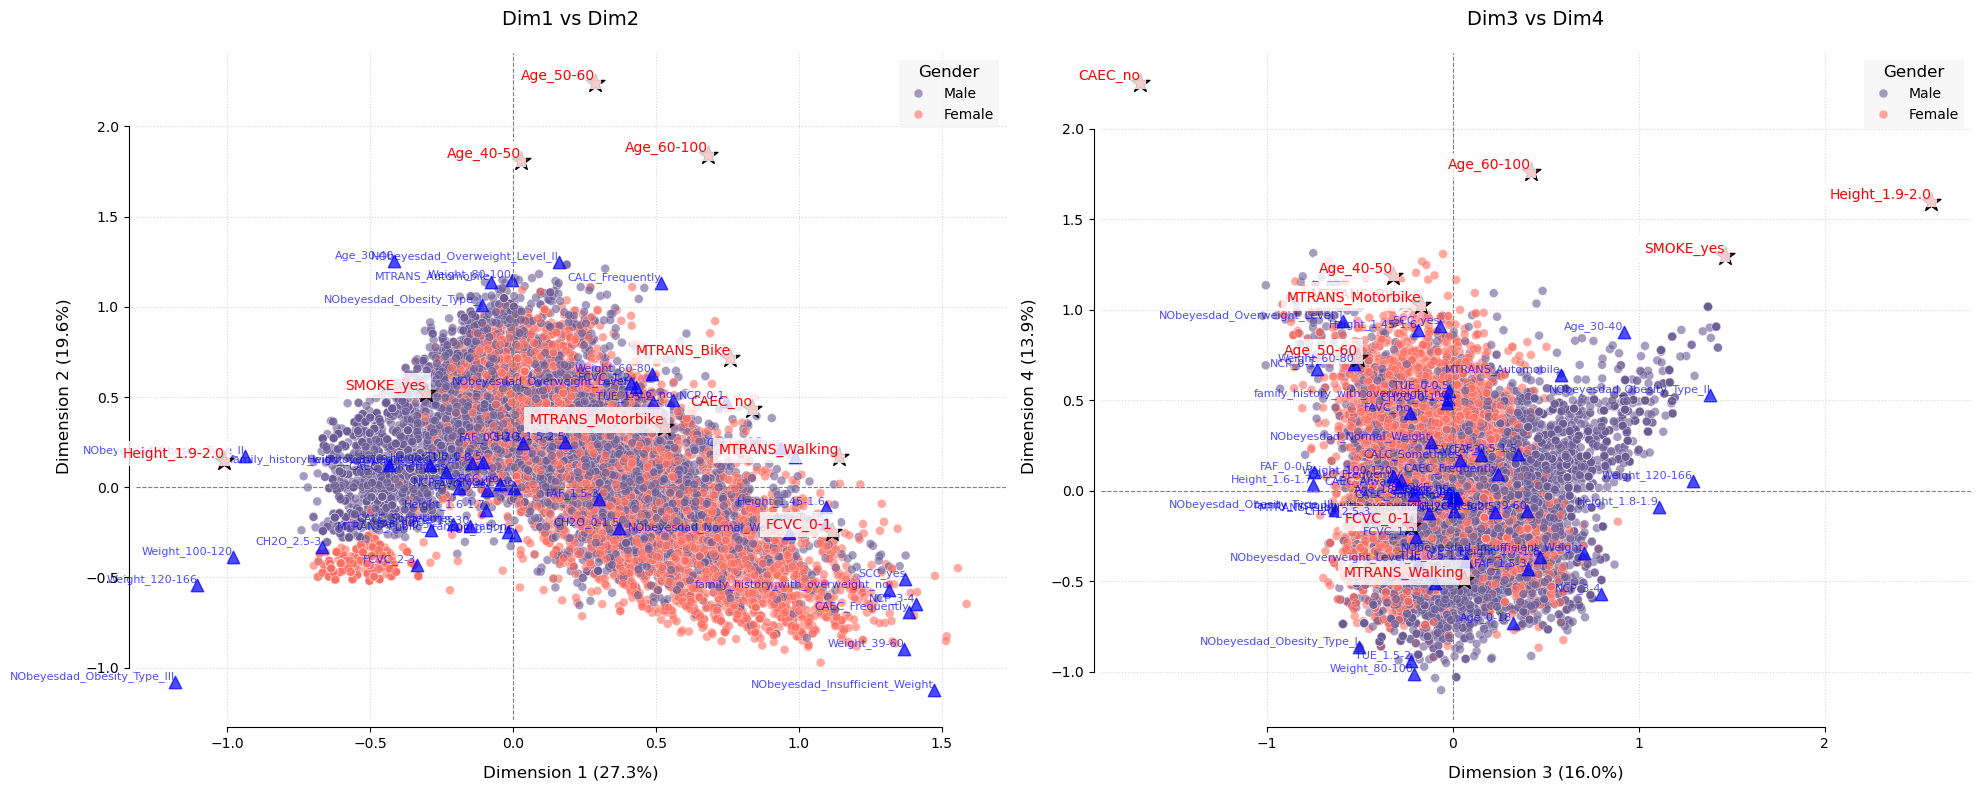

In [12]:
# ------------------ 数据准备 ------------------
# 选择分类变量并清理数据（保留 'Gender' 用于颜色映射）
categorical_columns = df_final.select_dtypes(include=['object', 'category']).columns

df_mca = df_final[categorical_columns].dropna()

# 独热编码（排除 'Gender'，但保留原数据中的 'Gender' 列）
df_mca_encoded = pd.get_dummies(df_mca.drop(columns=['Gender']))
print("独热编码后变量数量:", df_mca_encoded.shape[1])

# 计算 nk, fk, Ctrlk
nk = df_mca_encoded.sum()
fk = nk / len(df_mca_encoded)
k = len(df_mca_encoded.columns)
q = len(categorical_columns) - 1  # 排除 'Gender' 后的分类变量数量
Ctrlk = (1 - fk) / (k - q)

# 合并到 DataFrame
result_df = pd.DataFrame({
    'Category': nk.index,
    'nk': nk.values,
    'fk': fk.values,
    'Ctrlk': Ctrlk.values
})

# 筛选前10个 Ctrlk 的类别
top_10_categories = result_df.nlargest(10, 'Ctrlk')['Category'].tolist()
#print (top_10_categories)

# ------------------ 执行 MCA ------------------
mca_no_one_hot = prince.MCA(n_components=6, random_state=42,one_hot=False)
mca_no_one_hot = mca_no_one_hot.fit(df_mca_encoded)

# 获取坐标
row_coords = mca_no_one_hot.transform(df_mca_encoded)  # 个体坐标（所有四个维度）
column_coords = mca_no_one_hot.column_coordinates(df_mca_encoded)  # 变量坐标（所有四个维度）

#在column_coords找到top_10_categories并输出
print(column_coords.loc[top_10_categories].round(2))

# ------------------ 绘图优化 ------------------
# 创建 1行2列 的子图布局
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
plt.subplots_adjust(wspace=0.3)

# 定义要绘制的维度组合
dim_pairs = [
    (0, 1, "Dim1 vs Dim2"),  # 第一子图：Dim1 vs Dim2
    (2, 3, "Dim3 vs Dim4")   # 第二子图：Dim3 vs Dim4
]

# 循环绘制每个子图
for ax, (x_dim, y_dim, title) in zip(axes, dim_pairs):
    # 绘制个体点（按性别着色）
    sns.scatterplot(
        x=row_coords.iloc[:, x_dim],
        y=row_coords.iloc[:, y_dim],
        hue=df_mca['Gender'],
        palette={'Female': '#FF6F61', 'Male': '#6B5B95'},
        alpha=0.6,
        s=40,
        edgecolor='w',
        linewidth=0.3,
        ax=ax
    )
    
    # 绘制变量点，并突出显示前10个 Ctrlk 的类别
    for category in column_coords.index:
        x, y = column_coords.loc[category, x_dim], column_coords.loc[category, y_dim]
        if category in top_10_categories:
            ax.scatter(x, y, marker='*', s=200, color='red', edgecolor='k', zorder=3)
            ax.text(x, y, category, 
                    fontsize=10, color='red', ha='right', va='bottom',
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
        else:
            ax.scatter(x, y, marker='^', s=80, color='blue', alpha=0.7)
            ax.text(x, y, category, 
                    fontsize=8, color='blue', ha='right', va='bottom', alpha=0.7)
    
    # 添加参考线
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    ax.axvline(0, color='gray', linestyle='--', linewidth=0.8)
    
    # 计算当前维度的方差解释率
    total_inertia = sum(mca_no_one_hot.eigenvalues_)
    x_inertia = (mca_no_one_hot.eigenvalues_[x_dim] / total_inertia) * 100
    y_inertia = (mca_no_one_hot.eigenvalues_[y_dim] / total_inertia) * 100

    # 设置标题和坐标轴标签
    ax.set_xlabel(f"Dimension {x_dim+1} ({x_inertia:.1f}%)", fontsize=12, labelpad=10)
    ax.set_ylabel(f"Dimension {y_dim+1} ({y_inertia:.1f}%)", fontsize=12, labelpad=10)
    ax.set_title(title, fontsize=14, pad=20)
    
    # 添加图例和网格
    ax.legend(title='Gender', title_fontsize=12, loc='upper right', 
              facecolor='whitesmoke', edgecolor='none')
    ax.grid(True, linestyle=':', alpha=0.5)
    sns.despine(ax=ax, trim=True, offset=5)

# 调整布局并显示
plt.tight_layout()
plt.show()

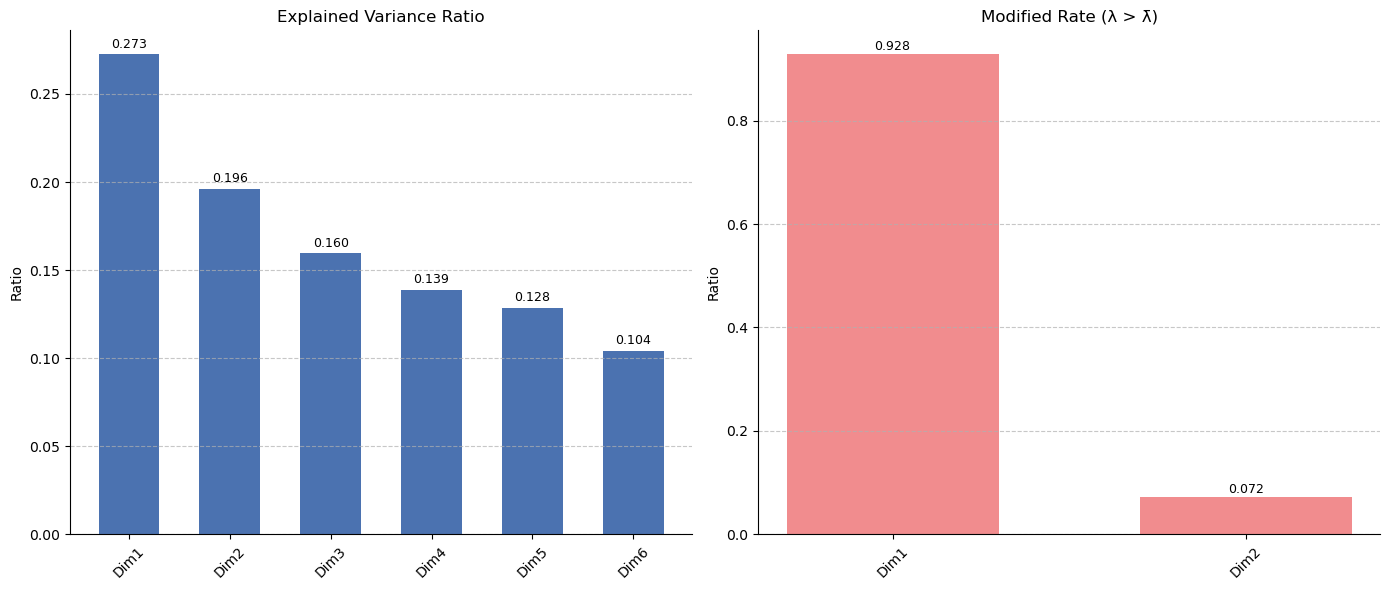

In [11]:
# ------------------ 计算方差解释率 ------------------
# 获取主成分的惯量（eigenvalues_）
eigenvalues = mca_no_one_hot.eigenvalues_[:6]  # 直接取前8个主成分的惯量

# 计算方差解释率（原始惯量比例）
explained_variance_ratios = eigenvalues / total_inertia

lambda_bar = np.mean(eigenvalues)  # λ̄，平均惯量
valid_indices = eigenvalues > lambda_bar
eigenvalues_valid = eigenvalues[valid_indices]

# Step 1: 伪特征值 λ' = (Q / (Q - 1))² * (λₗ - λ̄)²
pseudo_eigenvalues = ((q / (q - 1)) ** 2) * (eigenvalues_valid - lambda_bar) ** 2

# Step 2: 总和 S
S = np.sum(pseudo_eigenvalues)

# Step 3: Modified rate τₗ' = λₗ′ / S
modified_rates = pseudo_eigenvalues / S

dimensions_ev = [f'Dim{i+1}' for i in range(6)]
dimensions_mr = [f"Dim{i+1}" for i in range(len(eigenvalues)) if valid_indices[i]]

# ------------------ 绘制柱状图 ------------------
# 创建 1行2列 的图像
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ========== 左图：Explained Variance ==========
x1 = np.arange(len(dimensions_ev))
bars1 = axes[0].bar(x1, explained_variance_ratios, color='#4B72B0', width=0.6)

# 添加标签
for i in range(len(x1)):
    axes[0].text(x1[i], explained_variance_ratios[i]+0.002,
                 f'{explained_variance_ratios[i]:.3f}',
                 ha='center', va='bottom', fontsize=9)

# 设置轴和标题
axes[0].set_xticks(x1)
axes[0].set_xticklabels(dimensions_ev, rotation=45)
axes[0].set_ylabel("Ratio")
axes[0].set_title("Explained Variance Ratio")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# ========== 右图：Modified Rates ==========
x2 = np.arange(len(dimensions_mr))
bars2 = axes[1].bar(x2, modified_rates, color='#F18C8E', width=0.6)

# 添加标签
for i in range(len(x2)):
    axes[1].text(x2[i], modified_rates[i]+0.002,
                 f'{modified_rates[i]:.3f}',
                 ha='center', va='bottom', fontsize=9)

# 设置轴和标题
axes[1].set_xticks(x2)
axes[1].set_xticklabels(dimensions_mr, rotation=45)
axes[1].set_ylabel("Ratio")
axes[1].set_title("Modified Rate (λ > λ̄)")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# 去除多余边框 & 显示
sns.despine()
plt.tight_layout()
plt.show()

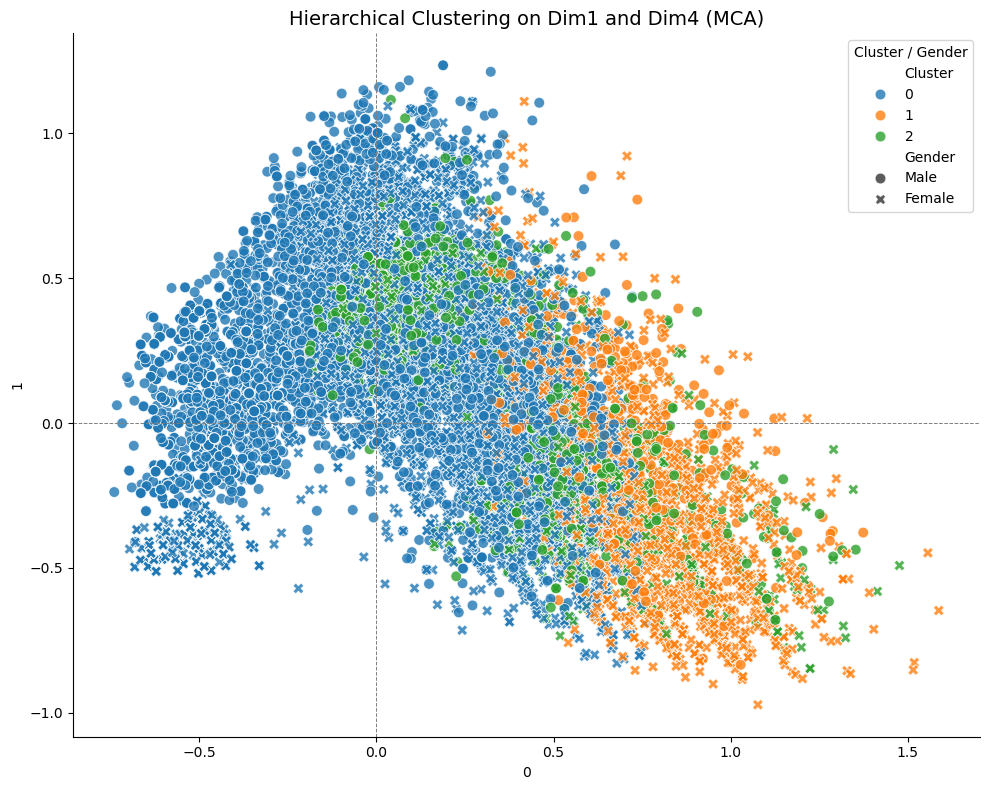

In [17]:
from sklearn.cluster import AgglomerativeClustering

# 使用前两个主成分作为聚类输入
coords_for_clustering = row_coords.iloc[:, [0, 3]]

# 层次聚类
clustering=AgglomerativeClustering(n_clusters=3, linkage='complete', metric='euclidean')
clusters = clustering.fit_predict(coords_for_clustering)

# 将聚类结果添加到 row_coords
row_coords["Cluster"] = clusters
row_coords["Gender"] = df_mca["Gender"].values

# 可视化聚类结果
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=row_coords.iloc[:, 0],  # 第一主成分
    y=row_coords.iloc[:, 1],  # 第二主成分
    hue=row_coords["Cluster"],
    style=df_mca["Gender"],   # 来自原始数据
    palette="tab10", s=60, edgecolor="w", alpha=0.8
)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.title("Hierarchical Clustering on Dim1 and Dim4 (MCA)", fontsize=14)
plt.legend(title="Cluster / Gender")
sns.despine()
plt.tight_layout()
plt.show()

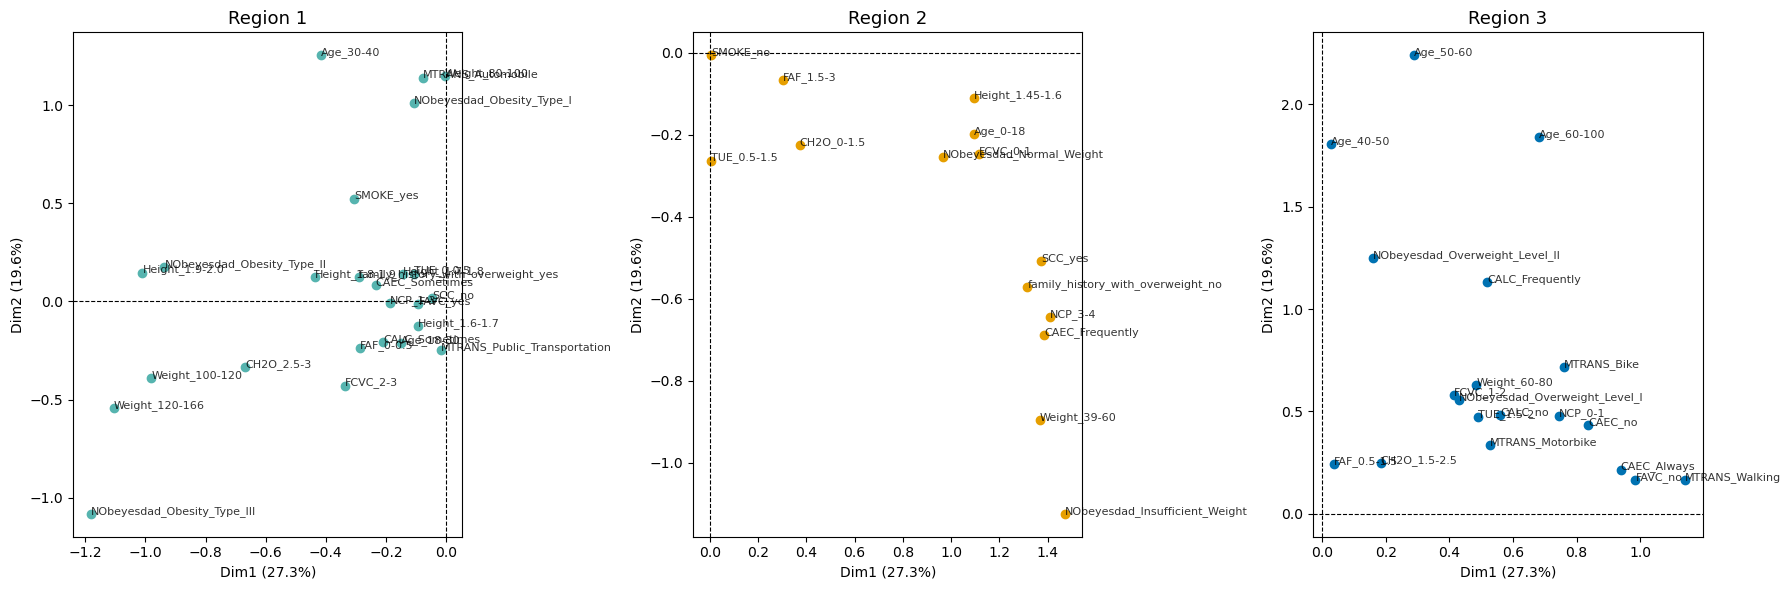

In [5]:
# 确保列名正确
column_coords.columns = [f"Dim{i+1}" for i in range(column_coords.shape[1])]

# 构建 DataFrame 并按新的 Region 划分
col_df = column_coords[["Dim1", "Dim2"]].copy()

# 三区域划分逻辑
col_df["Region"] = np.select(
    [
        col_df["Dim1"] < 0,
        (col_df["Dim1"] > 0) & (col_df["Dim2"] < 0),
        (col_df["Dim1"] > 0) & (col_df["Dim2"] > 0)
    ],
    ["Region 1", "Region 2", "Region 3"],
    default="Unclassified"
)

col_df["Label"] = col_df.index

# ------------------ 画图 ------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
region_names = ["Region 1", "Region 2", "Region 3"]
region_colors = ["#56B4AF", "#E69F00", "#0072B2"]

for ax, region, color in zip(axes, region_names, region_colors):
    region_df = col_df[col_df["Region"] == region]

    ax.scatter(region_df["Dim1"], region_df["Dim2"], c=color, label=region)
    for _, row in region_df.iterrows():
        ax.text(row["Dim1"], row["Dim2"], row["Label"], fontsize=8, alpha=0.8)

    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
    ax.axvline(0, color='black', linestyle='--', linewidth=0.8)
    ax.set_title(region, fontsize=13)
    ax.set_xlabel("Dim1 (27.3%)")
    ax.set_ylabel("Dim2 (19.6%)")

plt.tight_layout()
plt.show()
